[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Sistemas-Multimedia/Sistemas-Multimedia.github.io/HEAD?labpath=contents%2Fscalar_quantization%2Fmidtread.ipynb)

[![Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=notebook)](https://colab.research.google.com/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/contents/scalar_quantization/midtread.ipynb)

# Gray Image compression Using a Midtread Quantizer

In [1]:
%%bash
if [ -d "$HOME/repos" ]; then
    echo "\"$HOME/repos\" exists"
else
    mkdir ~/repos
    echo Created $HOME/repos
fi

"/home/vruiz/repos" exists


In [2]:
%%bash
if [ -d "$HOME/repos/scalar_quantization" ]; then
    cd $HOME/repos/scalar_quantization
    echo "$HOME/repos/scalar_quantization ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/scalar_quantization.git
fi

/home/vruiz/repos/scalar_quantization ... 
Ya está actualizado.


In [3]:
%%bash
if [ -d "$HOME/repos/MRVC" ]; then
    cd $HOME/repos/MRVC
    echo "$HOME/repos/MRVC ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/Sistemas-Multimedia/MRVC.git
fi

/home/vruiz/repos/MRVC ... 
Ya está actualizado.


In [4]:
%%bash
if [ -d "$HOME/repos/image_IO" ]; then
    cd $HOME/repos/image_IO
    echo "$HOME/repos/image_IO ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/image_IO.git
fi

/home/vruiz/repos/image_IO ... 
Ya está actualizado.


In [5]:
#!ln -sf ~/MRVC/src/debug.py .
!ln -sf ~/MRVC/src/logging_config.py .
!ln -sf ~/repos/scalar_quantization/quantizer.py .
!ln -sf ~/repos/scalar_quantization/midtread_quantization.py .
!ln -sf ~/repos/scalar_quantization/distortion.py .
#!ln -sf ~/MRVC/src/image_3.py .
#!ln -sf ~/MRVC/src/image_1.py .
!ln -sf ~/repos/scalar_quantization/information.py .
!ln -sf ~/repos/image_IO/image_1.py .
!ln -sf ~/repos/image_IO/logging_config.py .

In [6]:
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.axes as ax
    #plt.rcParams['text.usetex'] = True
    #plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
%matplotlib inline

try:
    import scipy
except:
    !pip install scipy
    
try:
    import cv2
except:
    !pip install opencv-python
    !pip install opencv-python-headless # Binder compatibility
    import cv2

try:
    import skimage
except:
    !pip install scikit-image
    import skimage
    
try:
    import colored
except:
    !pip install colored
    import colored

import pylab
import math
import numpy as np
from scipy import signal
import cv2
import os
import midtread_quantization as midtread
import distortion
#import image_3 as RGB_image
import image_1 as gray_image
import colored
import information

## Configuration

In [7]:
# Prefix of the RGB image to be quantized.

home = os.environ["HOME"]
fn = home + "/repos/MRVC/images/lena_bw/"
!ls -l {fn}

components = ['R', 'G', 'B']

quantizer = midtread

Q_steps = [2**i for i in range(7, -1, -1)] # Quantization steps (simulating bit-plane encoding)
print(Q_steps)

#RGB_image.write = RGB_image.debug_write # faster
#RGB_image.write = RGB_image.write # higher compression

gray_image.write = gray_image.debug_write # faster
#gray_image.write = gray_image.write # higher compression

total 148
-rw-r--r-- 1 vruiz vruiz 151199 feb 18 22:33 000.png
[128, 64, 32, 16, 8, 4, 2, 1]


Notice that non embbeded quatization (using steps thar are different from a power of 2) steps (can produce loops in the RD curves due to the non-linearity of the integer division performed in the quantization).

## Read the image and show it

[image_1.py:62 print_stats() INFO] max=245 min=25 avg=124.05046081542969


int16
245 25


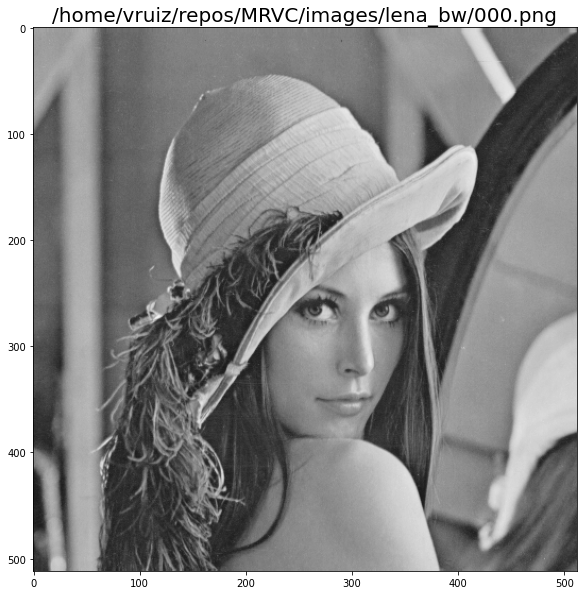

In [8]:
img = gray_image.read(fn, 0).astype(np.int16) # 8 bits/components is not sufficient to shift the components to [-128, 127]
print(img.dtype)
print(img.max(), img.min())
gray_image.show(img, fn + "000.png")

## Show some quantizations

In [9]:
QS = 128 # Quantization Step

In [10]:
Q = quantizer.Midtread_Quantizer(Q_step=QS, min_val=0, max_val=255)
print(Q.get_decision_levels())
print(Q.get_representation_levels())

[  0  64 191 255]
[  0 128]


[image_1.py:62 print_stats() INFO] max=2 min=0 avg=0.9277877807617188
[image_1.py:62 print_stats() INFO] max=256 min=0 avg=118.7568359375


Used quantization indexes: [0 1 2]
MSE = 1375.6852264404297
SSIM = 0.5570231919191174
entropy = 1.0700335277459005


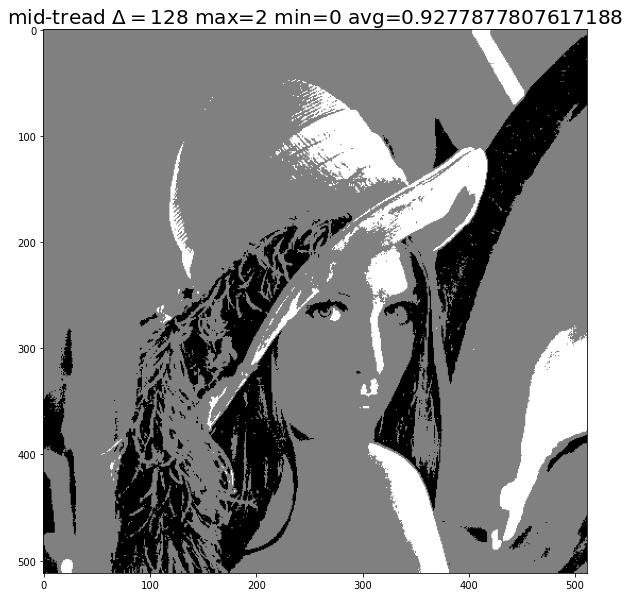

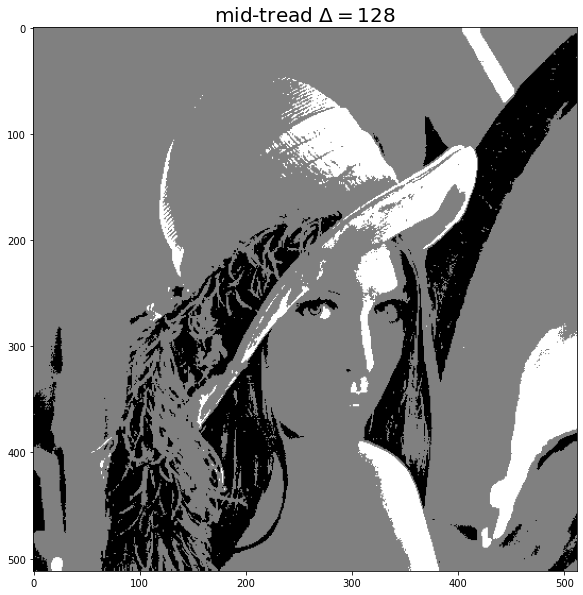

In [11]:
y, k = Q.quan_dequan(img)
print("Used quantization indexes:", np.unique(k))
gray_image.show_normalized(k, f"{quantizer.name} $\\Delta={QS}$")
gray_image.show(y, f"{quantizer.name} $\\Delta={QS}$")
print("MSE =", distortion.MSE(img, y))
print("SSIM =", distortion.SSIM(img, y))
print("entropy =", information.entropy(k.flatten()))

In [12]:
QS = 64 # Quantization Step
Q = quantizer.Midtread_Quantizer(Q_step=QS, min_val=0, max_val=255)
print(Q.get_decision_levels())
print(Q.get_representation_levels())

[  0  32  95 160 223 255]
[  0  64 128 192]


[image_1.py:62 print_stats() INFO] max=4 min=0 avg=1.9402694702148438
[image_1.py:62 print_stats() INFO] max=256 min=0 avg=124.17724609375


Used quantization indexes: [0 1 2 3 4]
MSE = 344.7745819091797
SSIM = 0.6675336493412244
entropy = 1.5295290121006717


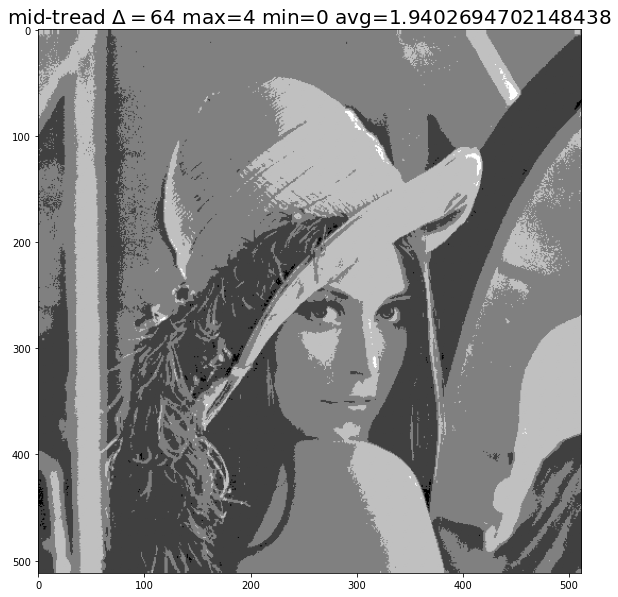

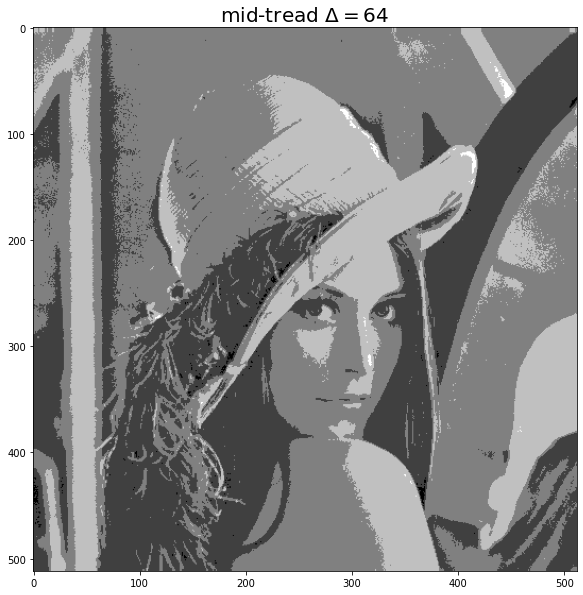

In [13]:
y, k = Q.quan_dequan(img)
print("Used quantization indexes:", np.unique(k))
gray_image.show_normalized(k, f"{quantizer.name} $\\Delta={QS}$")
gray_image.show(y, f"{quantizer.name} $\\Delta={QS}$")
print("MSE =", distortion.MSE(img, y))
print("SSIM =", distortion.SSIM(img, y))
print("entropy =", information.entropy(k.flatten()))

## RD curve

In [14]:
def RD_curve(img, Q_steps, quantizer):
    points = []
    for Q_step in Q_steps:
        Q = quantizer.Midtread_Quantizer(Q_step=Q_step, min_val=0, max_val=255)
        y, k = Q.quan_dequan(img)
        k = k.astype(np.uint8) # Only positive components can be written in an PNG file
        print("Quantization indexes: ", np.unique(k))
        rate = gray_image.write(k, "/tmp/" + str(Q_step) + '_', 0)*8/k.size
        _distortion = distortion.RMSE(img, y)
        points.append((rate, _distortion))
        print(f"q_step={Q_step:>3}, rate={rate:>7} bits/pixel, distortion={_distortion:>6.1f}")
    return points

RD_points = RD_curve(img, Q_steps, quantizer)

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/128_000.png (512, 512) uint8 len=12775 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/64_000.png (512, 512) uint8 len=18657 max=4 min=0


Quantization indexes:  [0 1 2]
q_step=128, rate=0.389862060546875 bits/pixel, distortion=  37.1
Quantization indexes:  [0 1 2 3 4]
q_step= 64, rate=0.569366455078125 bits/pixel, distortion=  18.6
Quantization indexes:  [1 2 3 4 5 6 7 8]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/32_000.png (512, 512) uint8 len=33791 max=8 min=1


q_step= 32, rate=1.031219482421875 bits/pixel, distortion=   9.4
Quantization indexes:  [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/16_000.png (512, 512) uint8 len=49235 max=15 min=2


q_step= 16, rate=1.502532958984375 bits/pixel, distortion=   4.6
Quantization indexes:  [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/8_000.png (512, 512) uint8 len=73096 max=31 min=3
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/4_000.png (512, 512) uint8 len=101803 max=61 min=6


q_step=  8, rate=2.230712890625 bits/pixel, distortion=   2.3
Quantization indexes:  [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/2_000.png (512, 512) uint8 len=132628 max=122 min=12
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/1_000.png (512, 512) uint8 len=164565 max=245 min=25


q_step=  4, rate=3.106781005859375 bits/pixel, distortion=   1.2
Quantization indexes:  [ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 121 122]
q_step=  2, rate=4.0474853515625 bits/pixel, distortion=   0.7
Quantization indexes:  [ 25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 

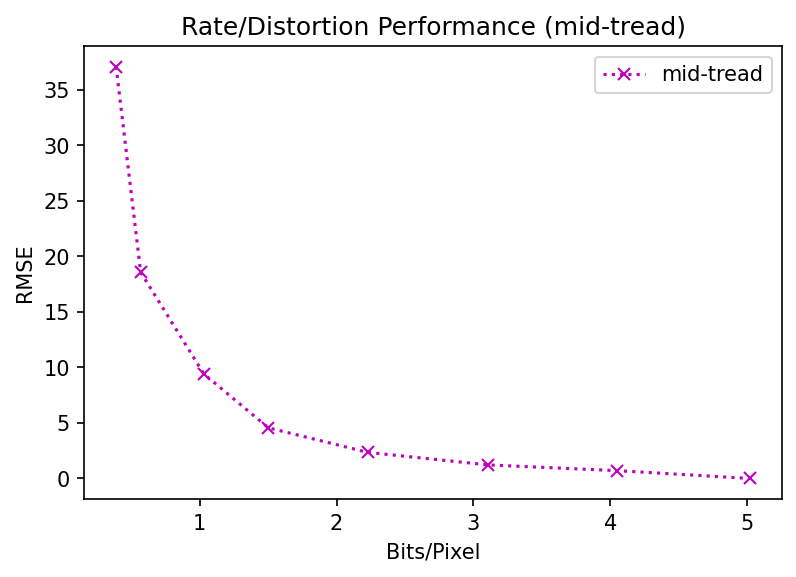

In [15]:
pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points), c='m', marker='x', label=f"{quantizer.name}", linestyle="dotted")
pylab.title(f"Rate/Distortion Performance ({quantizer.name})")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
pylab.show()

In [16]:
print(quantizer.name)
with open(f"{quantizer.name}_RD_points.txt", 'w') as f:
    for item in RD_points:
        f.write(f"{item[0]}\t{item[1]}\n")

mid-tread


## What happens if we increase the granuality?
Let's see the effect of using a finer quantization step (size).

In [17]:
Q_steps = range(128, 0, -1)

In [20]:
RD_points_finer = RD_curve(img, Q_steps, quantizer)

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/128_000.png (512, 512) uint8 len=12775 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/127_000.png (512, 512) uint8 len=12831 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/126_000.png (512, 512) uint8 len=12786 max=2 min=0


Quantization indexes:  [0 1 2]
q_step=128, rate=0.389862060546875 bits/pixel, distortion=  37.1
Quantization indexes:  [0 1 2]
q_step=127, rate=0.391571044921875 bits/pixel, distortion=  36.9
Quantization indexes:  [0 1 2]
q_step=126, rate=0.39019775390625 bits/pixel, distortion=  36.7


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/125_000.png (512, 512) uint8 len=12998 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/124_000.png (512, 512) uint8 len=13032 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/123_000.png (512, 512) uint8 len=13298 max=2 min=0


Quantization indexes:  [0 1 2]
q_step=125, rate=0.39666748046875 bits/pixel, distortion=  36.5
Quantization indexes:  [0 1 2]
q_step=124, rate=0.397705078125 bits/pixel, distortion=  36.3
Quantization indexes:  [0 1 2]
q_step=123, rate=0.40582275390625 bits/pixel, distortion=  36.1


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/122_000.png (512, 512) uint8 len=13498 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/121_000.png (512, 512) uint8 len=13906 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/120_000.png (512, 512) uint8 len=14241 max=2 min=0


Quantization indexes:  [0 1 2]
q_step=122, rate=0.41192626953125 bits/pixel, distortion=  36.0
Quantization indexes:  [0 1 2]
q_step=121, rate=0.42437744140625 bits/pixel, distortion=  35.8
Quantization indexes:  [0 1 2]
q_step=120, rate=0.434600830078125 bits/pixel, distortion=  35.7


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/119_000.png (512, 512) uint8 len=14470 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/118_000.png (512, 512) uint8 len=14884 max=2 min=0


Quantization indexes:  [0 1 2]
q_step=119, rate=0.44158935546875 bits/pixel, distortion=  35.5
Quantization indexes:  [0 1 2]
q_step=118, rate=0.4542236328125 bits/pixel, distortion=  35.4
Quantization indexes:  [0 1 2]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/117_000.png (512, 512) uint8 len=15235 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/116_000.png (512, 512) uint8 len=15364 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/115_000.png (512, 512) uint8 len=15624 max=2 min=0


q_step=117, rate=0.464935302734375 bits/pixel, distortion=  35.3
Quantization indexes:  [0 1 2]
q_step=116, rate=0.4688720703125 bits/pixel, distortion=  35.1
Quantization indexes:  [0 1 2]
q_step=115, rate=0.476806640625 bits/pixel, distortion=  35.0
Quantization indexes:  [0 1 2]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/114_000.png (512, 512) uint8 len=15664 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/113_000.png (512, 512) uint8 len=15859 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/112_000.png (512, 512) uint8 len=15985 max=2 min=0


q_step=114, rate=0.47802734375 bits/pixel, distortion=  34.8
Quantization indexes:  [0 1 2]
q_step=113, rate=0.483978271484375 bits/pixel, distortion=  34.7
Quantization indexes:  [0 1 2]
q_step=112, rate=0.487823486328125 bits/pixel, distortion=  34.5
Quantization indexes:  [0 1 2]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/111_000.png (512, 512) uint8 len=16447 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/110_000.png (512, 512) uint8 len=16665 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/109_000.png (512, 512) uint8 len=17160 max=2 min=0


q_step=111, rate=0.501922607421875 bits/pixel, distortion=  34.4
Quantization indexes:  [0 1 2]
q_step=110, rate=0.508575439453125 bits/pixel, distortion=  34.2
Quantization indexes:  [0 1 2]
q_step=109, rate=0.523681640625 bits/pixel, distortion=  34.0
Quantization indexes:  [0 1 2]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/108_000.png (512, 512) uint8 len=17641 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/107_000.png (512, 512) uint8 len=18223 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/106_000.png (512, 512) uint8 len=18665 max=2 min=0


q_step=108, rate=0.538360595703125 bits/pixel, distortion=  33.9
Quantization indexes:  [0 1 2]
q_step=107, rate=0.556121826171875 bits/pixel, distortion=  33.7
Quantization indexes:  [0 1 2]
q_step=106, rate=0.569610595703125 bits/pixel, distortion=  33.6
Quantization indexes:  [0 1 2]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/105_000.png (512, 512) uint8 len=19041 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/104_000.png (512, 512) uint8 len=19545 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/103_000.png (512, 512) uint8 len=19755 max=2 min=0


q_step=105, rate=0.581085205078125 bits/pixel, distortion=  33.3
Quantization indexes:  [0 1 2]
q_step=104, rate=0.596466064453125 bits/pixel, distortion=  33.1
Quantization indexes:  [0 1 2]
q_step=103, rate=0.602874755859375 bits/pixel, distortion=  32.9


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/102_000.png (512, 512) uint8 len=19729 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/101_000.png (512, 512) uint8 len=19579 max=2 min=0


Quantization indexes:  [0 1 2]
q_step=102, rate=0.602081298828125 bits/pixel, distortion=  32.6
Quantization indexes:  [0 1 2]
q_step=101, rate=0.597503662109375 bits/pixel, distortion=  32.3
Quantization indexes:  [0 1 2]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/100_000.png (512, 512) uint8 len=19320 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/99_000.png (512, 512) uint8 len=19455 max=2 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/98_000.png (512, 512) uint8 len=19671 max=2 min=0


q_step=100, rate=0.589599609375 bits/pixel, distortion=  32.0
Quantization indexes:  [0 1 2]
q_step= 99, rate=0.593719482421875 bits/pixel, distortion=  31.6
Quantization indexes:  [0 1 2]
q_step= 98, rate=0.600311279296875 bits/pixel, distortion=  31.3


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/97_000.png (512, 512) uint8 len=19688 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/96_000.png (512, 512) uint8 len=19861 max=3 min=0


Quantization indexes:  [0 1 2 3]
q_step= 97, rate=0.600830078125 bits/pixel, distortion=  30.9
Quantization indexes:  [0 1 2 3]
q_step= 96, rate=0.606109619140625 bits/pixel, distortion=  30.6
Quantization indexes:  [0 1 2 3]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/95_000.png (512, 512) uint8 len=19699 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/94_000.png (512, 512) uint8 len=19546 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/93_000.png (512, 512) uint8 len=19041 max=3 min=0


q_step= 95, rate=0.601165771484375 bits/pixel, distortion=  30.2
Quantization indexes:  [0 1 2 3]
q_step= 94, rate=0.59649658203125 bits/pixel, distortion=  29.8
Quantization indexes:  [0 1 2 3]
q_step= 93, rate=0.581085205078125 bits/pixel, distortion=  29.5


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/92_000.png (512, 512) uint8 len=18950 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/91_000.png (512, 512) uint8 len=18394 max=3 min=0


Quantization indexes:  [0 1 2 3]
q_step= 92, rate=0.57830810546875 bits/pixel, distortion=  29.1
Quantization indexes:  [0 1 2 3]
q_step= 91, rate=0.56134033203125 bits/pixel, distortion=  28.7
Quantization indexes:  [0 1 2 3]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/90_000.png (512, 512) uint8 len=18523 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/89_000.png (512, 512) uint8 len=18394 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/88_000.png (512, 512) uint8 len=19012 max=3 min=0


q_step= 90, rate=0.565277099609375 bits/pixel, distortion=  28.4
Quantization indexes:  [0 1 2 3]
q_step= 89, rate=0.56134033203125 bits/pixel, distortion=  28.0
Quantization indexes:  [0 1 2 3]
q_step= 88, rate=0.5802001953125 bits/pixel, distortion=  27.7
Quantization indexes:  [0 1 2 3]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/87_000.png (512, 512) uint8 len=18862 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/86_000.png (512, 512) uint8 len=19450 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/85_000.png (512, 512) uint8 len=19429 max=3 min=0


q_step= 87, rate=0.57562255859375 bits/pixel, distortion=  27.4
Quantization indexes:  [0 1 2 3]
q_step= 86, rate=0.59356689453125 bits/pixel, distortion=  27.0
Quantization indexes:  [0 1 2 3]
q_step= 85, rate=0.592926025390625 bits/pixel, distortion=  26.6
Quantization indexes:  [0 1 2 3]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/84_000.png (512, 512) uint8 len=19360 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/83_000.png (512, 512) uint8 len=18856 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/82_000.png (512, 512) uint8 len=18515 max=3 min=0


q_step= 84, rate=0.5908203125 bits/pixel, distortion=  26.2
Quantization indexes:  [0 1 2 3]
q_step= 83, rate=0.575439453125 bits/pixel, distortion=  25.8
Quantization indexes:  [0 1 2 3]
q_step= 82, rate=0.565032958984375 bits/pixel, distortion=  25.3
Quantization indexes:  [0 1 2 3]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/81_000.png (512, 512) uint8 len=17687 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/80_000.png (512, 512) uint8 len=17504 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/79_000.png (512, 512) uint8 len=17156 max=3 min=0


q_step= 81, rate=0.539764404296875 bits/pixel, distortion=  24.7
Quantization indexes:  [0 1 2 3]
q_step= 80, rate=0.5341796875 bits/pixel, distortion=  24.2
Quantization indexes:  [0 1 2 3]
q_step= 79, rate=0.5235595703125 bits/pixel, distortion=  23.6
Quantization indexes:  [0 1 2 3]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/78_000.png (512, 512) uint8 len=17059 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/77_000.png (512, 512) uint8 len=16553 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/76_000.png (512, 512) uint8 len=16544 max=3 min=0


q_step= 78, rate=0.520599365234375 bits/pixel, distortion=  23.0
Quantization indexes:  [0 1 2 3]
q_step= 77, rate=0.505157470703125 bits/pixel, distortion=  22.5
Quantization indexes:  [0 1 2 3]
q_step= 76, rate=0.5048828125 bits/pixel, distortion=  21.9
Quantization indexes:  [0 1 2 3]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/75_000.png (512, 512) uint8 len=16135 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/74_000.png (512, 512) uint8 len=16239 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/73_000.png (512, 512) uint8 len=16145 max=3 min=0


q_step= 75, rate=0.492401123046875 bits/pixel, distortion=  21.4
Quantization indexes:  [0 1 2 3]
q_step= 74, rate=0.495574951171875 bits/pixel, distortion=  20.9
Quantization indexes:  [0 1 2 3]
q_step= 73, rate=0.492706298828125 bits/pixel, distortion=  20.5
Quantization indexes:  [0 1 2 3]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/72_000.png (512, 512) uint8 len=16597 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/71_000.png (512, 512) uint8 len=16995 max=3 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/70_000.png (512, 512) uint8 len=17658 max=4 min=0


q_step= 72, rate=0.506500244140625 bits/pixel, distortion=  20.2
Quantization indexes:  [0 1 2 3]
q_step= 71, rate=0.518646240234375 bits/pixel, distortion=  19.9
Quantization indexes:  [0 1 2 3 4]
q_step= 70, rate=0.53887939453125 bits/pixel, distortion=  19.6
Quantization indexes:  [0 1 2 3 4]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/69_000.png (512, 512) uint8 len=17621 max=4 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/68_000.png (512, 512) uint8 len=17888 max=4 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/67_000.png (512, 512) uint8 len=17857 max=4 min=0


q_step= 69, rate=0.537750244140625 bits/pixel, distortion=  19.3
Quantization indexes:  [0 1 2 3 4]
q_step= 68, rate=0.5458984375 bits/pixel, distortion=  19.1
Quantization indexes:  [0 1 2 3 4]
q_step= 67, rate=0.544952392578125 bits/pixel, distortion=  18.9
Quantization indexes:  [0 1 2 3 4]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/66_000.png (512, 512) uint8 len=18005 max=4 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/65_000.png (512, 512) uint8 len=18264 max=4 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/64_000.png (512, 512) uint8 len=18657 max=4 min=0


q_step= 66, rate=0.549468994140625 bits/pixel, distortion=  18.8
Quantization indexes:  [0 1 2 3 4]
q_step= 65, rate=0.557373046875 bits/pixel, distortion=  18.7
Quantization indexes:  [0 1 2 3 4]
q_step= 64, rate=0.569366455078125 bits/pixel, distortion=  18.6
Quantization indexes:  [0 1 2 3 4]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/63_000.png (512, 512) uint8 len=19210 max=4 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/62_000.png (512, 512) uint8 len=19655 max=4 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/61_000.png (512, 512) uint8 len=19719 max=4 min=0


q_step= 63, rate=0.58624267578125 bits/pixel, distortion=  18.5
Quantization indexes:  [0 1 2 3 4]
q_step= 62, rate=0.599822998046875 bits/pixel, distortion=  18.3
Quantization indexes:  [0 1 2 3 4]
q_step= 61, rate=0.601776123046875 bits/pixel, distortion=  18.1
Quantization indexes:  [0 1 2 3 4]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/60_000.png (512, 512) uint8 len=19767 max=4 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/59_000.png (512, 512) uint8 len=19805 max=4 min=0


q_step= 60, rate=0.603240966796875 bits/pixel, distortion=  17.8
Quantization indexes:  [0 1 2 3 4]
q_step= 59, rate=0.604400634765625 bits/pixel, distortion=  17.4
Quantization indexes:  [0 1 2 3 4]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/58_000.png (512, 512) uint8 len=20232 max=4 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/57_000.png (512, 512) uint8 len=20286 max=4 min=0


q_step= 58, rate=0.617431640625 bits/pixel, distortion=  16.9
Quantization indexes:  [0 1 2 3 4]
q_step= 57, rate=0.61907958984375 bits/pixel, distortion=  16.3
Quantization indexes:  [0 1 2 3 4]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/56_000.png (512, 512) uint8 len=20515 max=4 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/55_000.png (512, 512) uint8 len=20162 max=4 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/54_000.png (512, 512) uint8 len=20015 max=5 min=0


q_step= 56, rate=0.626068115234375 bits/pixel, distortion=  15.7
Quantization indexes:  [0 1 2 3 4]
q_step= 55, rate=0.61529541015625 bits/pixel, distortion=  15.1
Quantization indexes:  [0 1 2 3 4 5]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/53_000.png (512, 512) uint8 len=20428 max=5 min=0


q_step= 54, rate=0.610809326171875 bits/pixel, distortion=  14.5
Quantization indexes:  [0 1 2 3 4 5]
q_step= 53, rate=0.6234130859375 bits/pixel, distortion=  14.1
Quantization indexes:  [0 1 2 3 4 5]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/52_000.png (512, 512) uint8 len=21344 max=5 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/51_000.png (512, 512) uint8 len=22048 max=5 min=0


q_step= 52, rate=0.6513671875 bits/pixel, distortion=  13.7
Quantization indexes:  [0 1 2 3 4 5]
q_step= 51, rate=0.6728515625 bits/pixel, distortion=  13.4
Quantization indexes:  [0 1 2 3 4 5]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/50_000.png (512, 512) uint8 len=22451 max=5 min=0
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/49_000.png (512, 512) uint8 len=22165 max=5 min=1


q_step= 50, rate=0.685150146484375 bits/pixel, distortion=  13.2
Quantization indexes:  [1 2 3 4 5]
q_step= 49, rate=0.676422119140625 bits/pixel, distortion=  13.0
Quantization indexes:  [1 2 3 4 5]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/48_000.png (512, 512) uint8 len=22126 max=5 min=1
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/47_000.png (512, 512) uint8 len=22813 max=5 min=1


q_step= 48, rate=0.67523193359375 bits/pixel, distortion=  13.0
Quantization indexes:  [1 2 3 4 5]
q_step= 47, rate=0.696197509765625 bits/pixel, distortion=  12.9
Quantization indexes:  [1 2 3 4 5]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/46_000.png (512, 512) uint8 len=23989 max=5 min=1
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/45_000.png (512, 512) uint8 len=24689 max=5 min=1


q_step= 46, rate=0.732086181640625 bits/pixel, distortion=  12.9
Quantization indexes:  [1 2 3 4 5]
q_step= 45, rate=0.753448486328125 bits/pixel, distortion=  12.7
Quantization indexes:  [1 2 3 4 5 6]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/44_000.png (512, 512) uint8 len=25543 max=6 min=1
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/43_000.png (512, 512) uint8 len=25730 max=6 min=1


q_step= 44, rate=0.779510498046875 bits/pixel, distortion=  12.5
Quantization indexes:  [1 2 3 4 5 6]
q_step= 43, rate=0.78521728515625 bits/pixel, distortion=  12.1
Quantization indexes:  [1 2 3 4 5 6]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/42_000.png (512, 512) uint8 len=26450 max=6 min=1
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/41_000.png (512, 512) uint8 len=27415 max=6 min=1


q_step= 42, rate=0.80718994140625 bits/pixel, distortion=  11.8
Quantization indexes:  [1 2 3 4 5 6]
q_step= 41, rate=0.836639404296875 bits/pixel, distortion=  11.6
Quantization indexes:  [1 2 3 4 5 6]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/40_000.png (512, 512) uint8 len=28320 max=6 min=1
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/39_000.png (512, 512) uint8 len=28962 max=6 min=1


q_step= 40, rate=0.8642578125 bits/pixel, distortion=  11.5
Quantization indexes:  [1 2 3 4 5 6]
q_step= 39, rate=0.88385009765625 bits/pixel, distortion=  11.4
Quantization indexes:  [1 2 3 4 5 6]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/38_000.png (512, 512) uint8 len=29926 max=6 min=1
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/37_000.png (512, 512) uint8 len=30645 max=7 min=1


q_step= 38, rate=0.91326904296875 bits/pixel, distortion=  11.2
Quantization indexes:  [1 2 3 4 5 6 7]
q_step= 37, rate=0.935211181640625 bits/pixel, distortion=  11.0
Quantization indexes:  [1 2 3 4 5 6 7]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/36_000.png (512, 512) uint8 len=31569 max=7 min=1


q_step= 36, rate=0.963409423828125 bits/pixel, distortion=  10.7
Quantization indexes:  [1 2 3 4 5 6 7]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/35_000.png (512, 512) uint8 len=32080 max=7 min=1


q_step= 35, rate=0.97900390625 bits/pixel, distortion=  10.3
Quantization indexes:  [1 2 3 4 5 6 7]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/34_000.png (512, 512) uint8 len=32350 max=7 min=1


q_step= 34, rate=0.98724365234375 bits/pixel, distortion=  10.0
Quantization indexes:  [1 2 3 4 5 6 7]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/33_000.png (512, 512) uint8 len=32500 max=7 min=1


q_step= 33, rate=0.9918212890625 bits/pixel, distortion=   9.6
Quantization indexes:  [1 2 3 4 5 6 7 8]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/32_000.png (512, 512) uint8 len=33791 max=8 min=1


q_step= 32, rate=1.031219482421875 bits/pixel, distortion=   9.4
Quantization indexes:  [1 2 3 4 5 6 7 8]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/31_000.png (512, 512) uint8 len=33722 max=8 min=1


q_step= 31, rate=1.02911376953125 bits/pixel, distortion=   9.0
Quantization indexes:  [1 2 3 4 5 6 7 8]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/30_000.png (512, 512) uint8 len=34148 max=8 min=1


q_step= 30, rate=1.0421142578125 bits/pixel, distortion=   8.7
Quantization indexes:  [1 2 3 4 5 6 7 8]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/29_000.png (512, 512) uint8 len=36146 max=8 min=1


q_step= 29, rate=1.10308837890625 bits/pixel, distortion=   8.6
Quantization indexes:  [1 2 3 4 5 6 7 8 9]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/28_000.png (512, 512) uint8 len=37069 max=9 min=1


q_step= 28, rate=1.131256103515625 bits/pixel, distortion=   8.4
Quantization indexes:  [1 2 3 4 5 6 7 8 9]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/27_000.png (512, 512) uint8 len=35916 max=9 min=1


q_step= 27, rate=1.0960693359375 bits/pixel, distortion=   7.8
Quantization indexes:  [1 2 3 4 5 6 7 8 9]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/26_000.png (512, 512) uint8 len=35269 max=9 min=1


q_step= 26, rate=1.076324462890625 bits/pixel, distortion=   7.3
Quantization indexes:  [ 1  2  3  4  5  6  7  8  9 10]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/25_000.png (512, 512) uint8 len=35642 max=10 min=1


q_step= 25, rate=1.08770751953125 bits/pixel, distortion=   7.0
Quantization indexes:  [ 1  2  3  4  5  6  7  8  9 10]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/24_000.png (512, 512) uint8 len=38030 max=10 min=1


q_step= 24, rate=1.16058349609375 bits/pixel, distortion=   6.9
Quantization indexes:  [ 1  2  3  4  5  6  7  8  9 10 11]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/23_000.png (512, 512) uint8 len=40384 max=11 min=1


q_step= 23, rate=1.232421875 bits/pixel, distortion=   6.7
Quantization indexes:  [ 1  2  3  4  5  6  7  8  9 10 11]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/22_000.png (512, 512) uint8 len=41278 max=11 min=1


q_step= 22, rate=1.25970458984375 bits/pixel, distortion=   6.4
Quantization indexes:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/21_000.png (512, 512) uint8 len=42549 max=12 min=1


q_step= 21, rate=1.298492431640625 bits/pixel, distortion=   6.0
Quantization indexes:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/20_000.png (512, 512) uint8 len=43716 max=12 min=1


q_step= 20, rate=1.3341064453125 bits/pixel, distortion=   5.8
Quantization indexes:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/19_000.png (512, 512) uint8 len=45735 max=13 min=1


q_step= 19, rate=1.395721435546875 bits/pixel, distortion=   5.5
Quantization indexes:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/18_000.png (512, 512) uint8 len=47063 max=14 min=1


q_step= 18, rate=1.436248779296875 bits/pixel, distortion=   5.2
Quantization indexes:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/17_000.png (512, 512) uint8 len=48861 max=14 min=1


q_step= 17, rate=1.491119384765625 bits/pixel, distortion=   4.9
Quantization indexes:  [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/16_000.png (512, 512) uint8 len=49235 max=15 min=2


q_step= 16, rate=1.502532958984375 bits/pixel, distortion=   4.6
Quantization indexes:  [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/15_000.png (512, 512) uint8 len=52959 max=16 min=2


q_step= 15, rate=1.616180419921875 bits/pixel, distortion=   4.4
Quantization indexes:  [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/14_000.png (512, 512) uint8 len=54130 max=18 min=2


q_step= 14, rate=1.65191650390625 bits/pixel, distortion=   4.0
Quantization indexes:  [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/13_000.png (512, 512) uint8 len=56097 max=19 min=2


q_step= 13, rate=1.711944580078125 bits/pixel, distortion=   3.7
Quantization indexes:  [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/12_000.png (512, 512) uint8 len=59302 max=20 min=2


q_step= 12, rate=1.80975341796875 bits/pixel, distortion=   3.5
Quantization indexes:  [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/11_000.png (512, 512) uint8 len=61915 max=22 min=2


q_step= 11, rate=1.889495849609375 bits/pixel, distortion=   3.1
Quantization indexes:  [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/10_000.png (512, 512) uint8 len=65541 max=24 min=2


q_step= 10, rate=2.000152587890625 bits/pixel, distortion=   2.9
Quantization indexes:  [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/9_000.png (512, 512) uint8 len=69012 max=27 min=3


q_step=  9, rate=2.1060791015625 bits/pixel, distortion=   2.6
Quantization indexes:  [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/8_000.png (512, 512) uint8 len=73096 max=31 min=3


q_step=  8, rate=2.230712890625 bits/pixel, distortion=   2.3
Quantization indexes:  [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/7_000.png (512, 512) uint8 len=78175 max=35 min=4


q_step=  7, rate=2.385711669921875 bits/pixel, distortion=   2.0
Quantization indexes:  [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/6_000.png (512, 512) uint8 len=84531 max=41 min=4


q_step=  6, rate=2.579681396484375 bits/pixel, distortion=   1.8
Quantization indexes:  [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/5_000.png (512, 512) uint8 len=91656 max=49 min=5


q_step=  5, rate=2.797119140625 bits/pixel, distortion=   1.4
Quantization indexes:  [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/4_000.png (512, 512) uint8 len=101803 max=61 min=6
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/3_000.png (512, 512) uint8 len=114132 max=82 min=8
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/2_000.png (512, 512) uint8 len=132628 max=122 min=12


q_step=  4, rate=3.106781005859375 bits/pixel, distortion=   1.2
Quantization indexes:  [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 81 82]
q_step=  3, rate=3.4830322265625 bits/pixel, distortion=   0.8
Quantization indexes:  [ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 121 122]
q_step=  2, rate=4.0474853515625 bits/pixel, distortion=   0.7
Quantization indexes:  [ 25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/1_000.png (512, 512) uint8 len=164565 max=245 min=25


q_step=  1, rate=5.022125244140625 bits/pixel, distortion=   0.0


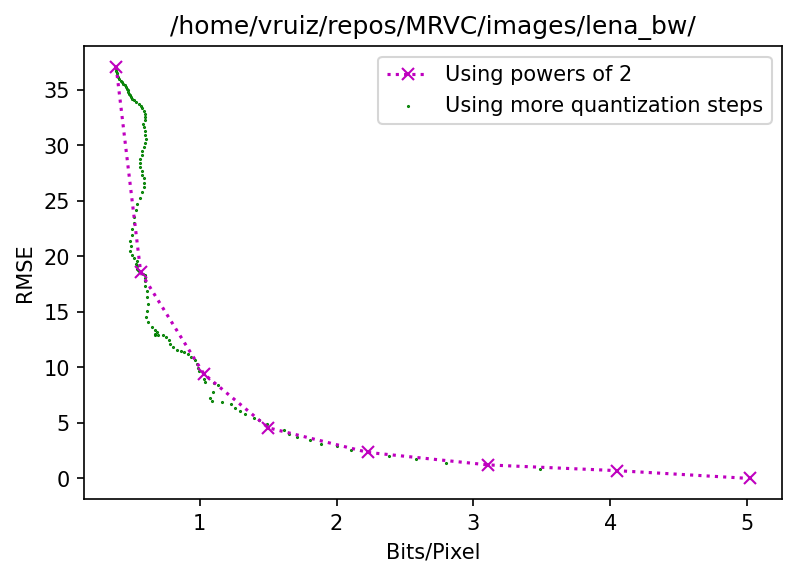

In [21]:
pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points), c='m', marker='x', label=f"Using powers of 2", linestyle="dotted")
pylab.scatter(*zip(*RD_points_finer), c='g', marker='.', label=f"Using more quantization steps", s=1)
pylab.title(fn)
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
pylab.show()

As it can be seen:

1. The use of quantization steps that are not powers of 2 can generate some cases in which when we decrease the step, the rate increases.
2. The use of quantization steps that are powers of 2 are on the convex hull of the RD curve (all the points contributes to the convexity of the curve).

In [19]:
import time
while True:
    time.sleep(1)

NameError: name 'true' is not defined